This is the collection of codes that explore the food atlas datasets and CDC datasets

The codes are written to explore the datasets and test the following hypothesis:

i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

iii. Does low access to grocery and supercenter correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

iv.	Does the type of local stores correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

v.	Do type of restaurants correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vi. Do food choice overall (defined as the combination of overall access to grocery store, type of local stores, and type of restaurants) correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vii.	Do level of physical activity correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

viii. Do change in physical activity or food environment correlate with change in prevalence of diabetes and obesity? How is the correlation for the overall population? Or in different states or areas of US?

ix. Are there counties with both high level of physical activity and rich food choice but high prevalence of diabetes or obesity? Similarly, are there counties with low level of physical activity and poor food choice but relatively low prevalence of diabetes and obestiy (clustering analysis?) If there are, whether additional data can explain the unusual observation? 

x. Are there counties with small change in level of physical activity and food choice but great change in prevalence of diabetes or obesity? Or vice versa? If there are, whether additional data can explain the unusual observation? 

This document is broken into five sections: 

I. Importing packages and Defining functions for analysis
II. Testing hypothesis i & ii
III. Testing hypothesis iii-vi
IV. Testing hypothesis vii
V. Testing hypothesis ix and x


Section I. Importing packages, Defining functions for analysis and import datasets

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##define functions

#Define function Boxplot_by_state() to draw boxplot by a groups: State, Areas with differnet composition of age group, socioeconomics, or their combinations

##### df: dataframe to read in, col:the col category by which the data is grouped, vert: direction of boxplot, 0 for horizontal and 1 for vertical
def Boxplot_by_state(df, col, by, vert):
    by_values=list(set(df[by]))
    by_values.sort()
    plt.figure(figsize=(18, 16))   
    boxes=list()
    for v in by_values:
        df_one_type=df[df[by]==v]
        boxes.append(list(df_one_type[col]))
    plt.boxplot(boxes,vert=vert)
    plt.yticks(range(1,len(by_values)+1), by_values)
    

            
#construct variable info dictionary for analysis
from collections import defaultdict

url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/variable_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1")
var_info_dict=dict()

for idx in var_info_df.index:
    
    k1=var_info_df['Category Name'][idx]
    k2=var_info_df['Category Code'][idx]
    k3=var_info_df['Sub_subcategory Name'][idx]
    k4=var_info_df['Units'][idx]
    var=var_info_df['Variable Code'][idx]
    
    if k3==np.nan:
        k3='Overall'
    var_info_dict[var]=[k1,k2,k3,k4]   
    

#create a subset of dataframe by category
def Df_subset(df, category,var_info_dict):
    vars_to_drop=[]
    for c in df_food.columns:
        if c not in ['State','County']:
            if var_info_dict[c][1] !=category:
                vars_to_drop.append(c)

    df_sub=df.drop(vars_to_drop, axis=1)
    return df_sub

Read food atlas dataset and CDC datasets and merge these two datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

food_atlas_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/df_tp_1.csv'
cdc_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/CDC/Combined.csv'

df_food=pd.read_csv(food_atlas_url,index_col='FIPS',encoding="ISO-8859-1")
df_cdc=pd.read_csv(cdc_url,index_col='FIPS',encoding="ISO-8859-1")

II. Testing hypothesis:
    i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

    ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

In [148]:
df_food.describe()

,Low_Access_Overall,Low_Access_Low_income,Low_Access_Children,Low_Access_Senior,Grocery,Supercenter,Convenience,Specialized,SNAP_store,WIC_store,Fast_food,Full_service,Assistance,Low_insecurity,Very_low_insecurity,Recreation_facility
count,3118.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,22.946432,8.374953,5.505321,3.915474,0.268142,0.015581,0.600116,0.056792,0.880064,0.255593,0.561422,0.774440,1.222476,15.024881,5.800000,0.077687
std,19.134196,8.214988,4.880426,4.215192,0.227271,0.020936,0.309923,0.075752,0.387638,0.257250,0.300987,0.584530,0.396835,2.378480,0.862656,0.078917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387918,8.700000,3.200000,0.000000
25%,10.723482,3.442171,2.396962,1.585764,0.149711,0.000000,0.406012,0.000000,0.629603,0.123272,0.403243,0.493836,0.954012,13.400000,5.100000,0.000000
50%,19.567871,6.150772,4.444210,2.827295,0.206697,0.007298,0.550178,0.043577,0.818400,0.189785,0.565323,0.667858,1.224745,14.900000,5.700000,0.070302
75%,29.254677,10.324935,6.964972,4.521918,0.305616,0.025621,0.727262,0.083710,1.066786,0.296110,0.703764,0.897423,1.424865,16.600000,6.500000,0.112864
max,100.000000,72.274456,34.015595,29.208633,3.073770,0.256213,3.121748,1.366120,6.658001,4.618937,6.088280,13.698630,2.552547,20.900000,8.100000,0.990099


In [203]:
df_food['Low_Access_Adult']=df_food['Low_Access_Overall']-df_food['Low_Access_Children']

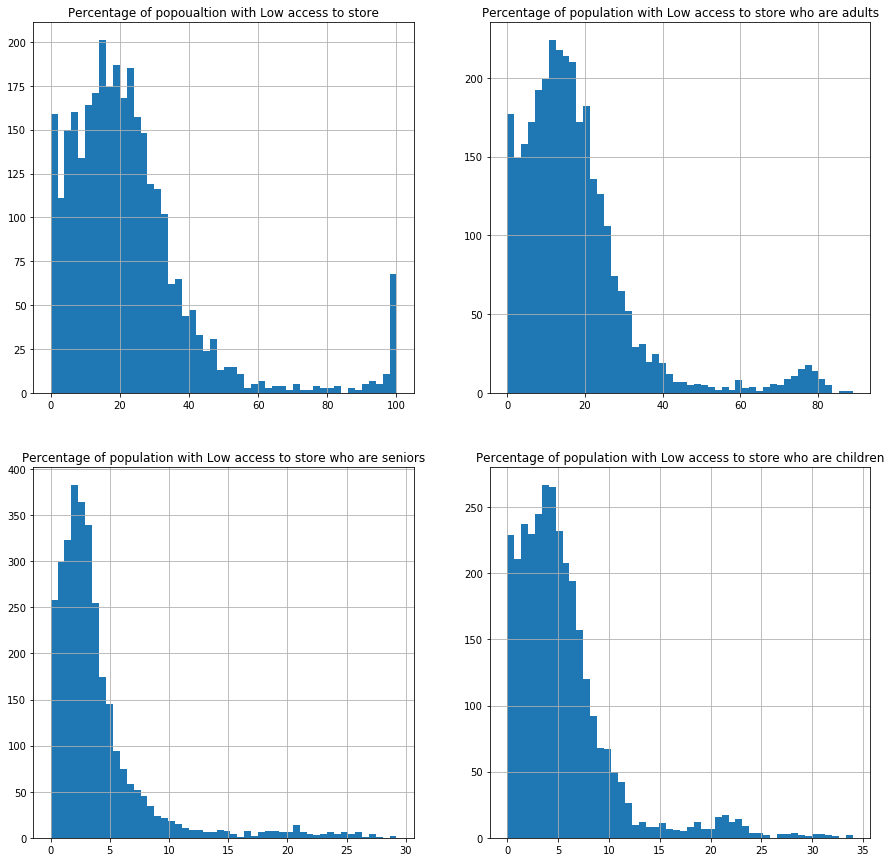

In [150]:
plt.figure(figsize=(15, 15)) 

plt.subplot(2,2,1)
plt.title('Percentage of popoualtion with Low access to store')
df_food['Low_Access_Overall'].hist(bins=50)
plt.legend()


plt.subplot(2,2,2)
plt.title('Percentage of population with Low access to store who are adults')
df_food['Low_Access_Adult'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,3)
plt.title('Percentage of population with Low access to store who are seniors')
df_food['Low_Access_Senior'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,4)
plt.title('Percentage of population with Low access to store who are children')
df_food['Low_Access_Children'].hist(bins=50)
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


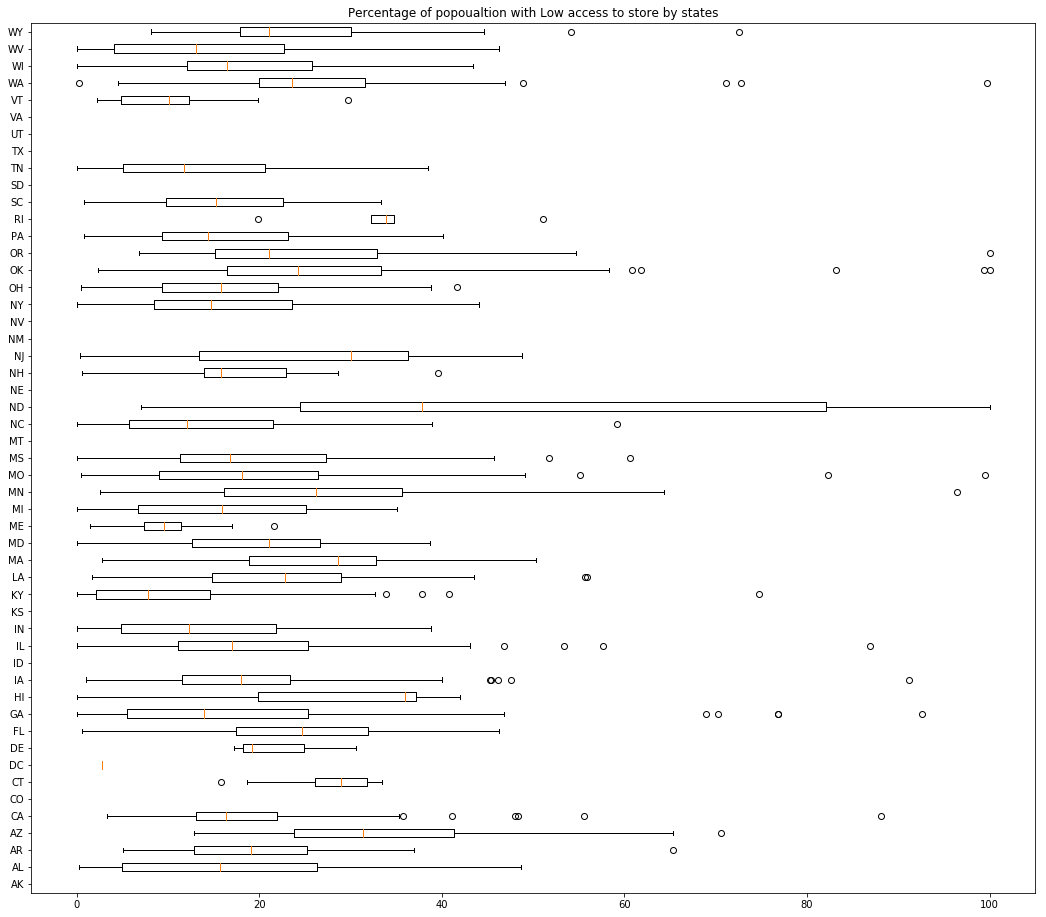

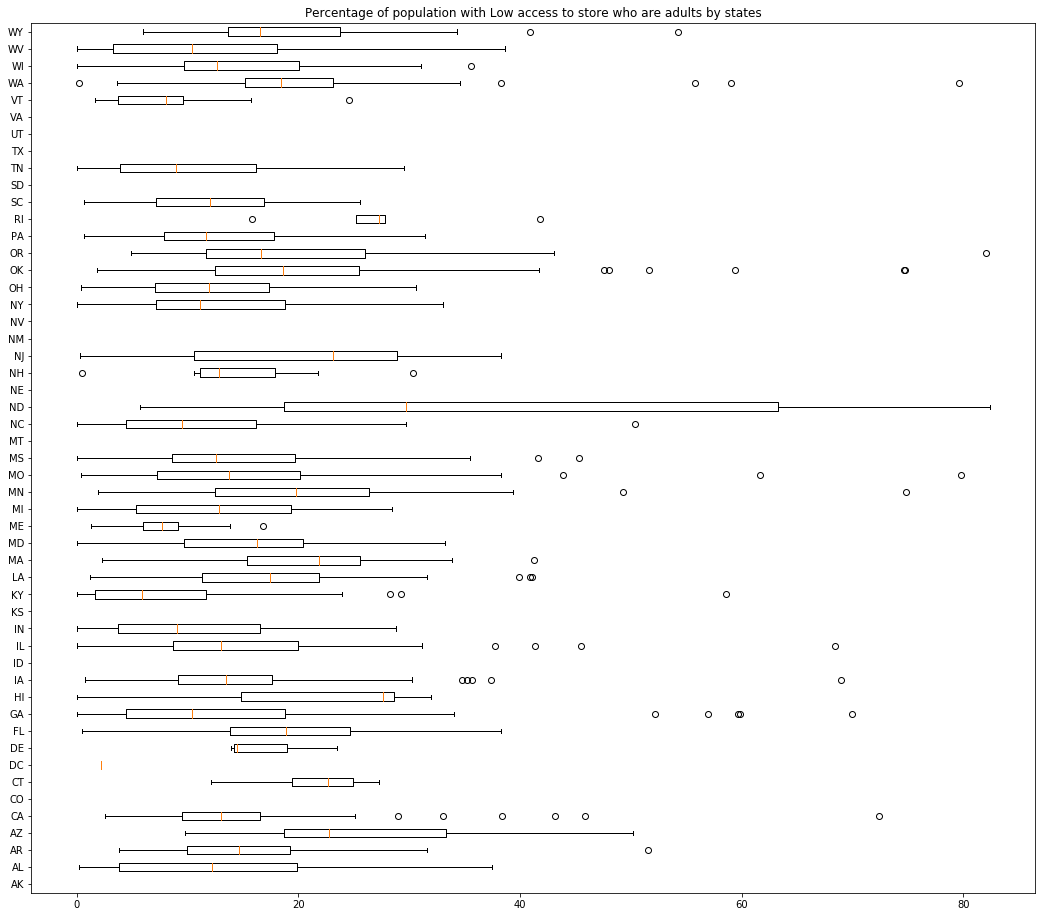

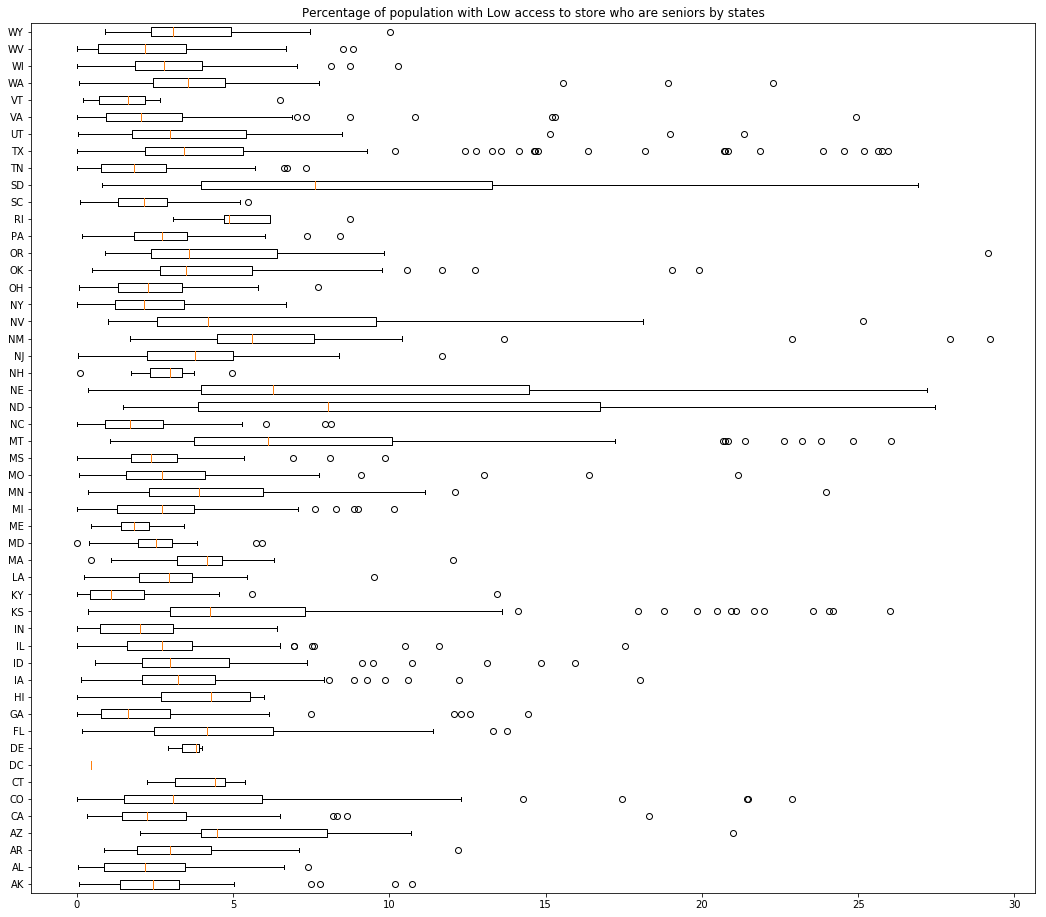

In [151]:
Boxplot_by_state(df_food, col='Low_Access_Overall', by='State', vert=0)
plt.title('Percentage of popoualtion with Low access to store by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Low_Access_Adult', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are adults by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Low_Access_Senior', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are seniors by states')
plt.legend()
plt.show()

In [152]:
#'FFRPTH09' is the number of fast food restaurant per 1000 pop and 'FSRPTH09' is the number of full service restaurant per 1000 pop
df_food['Percentage_fast_food']=df_food['Fast_food']/(df_food['Fast_food']+df_food['Full_service'])

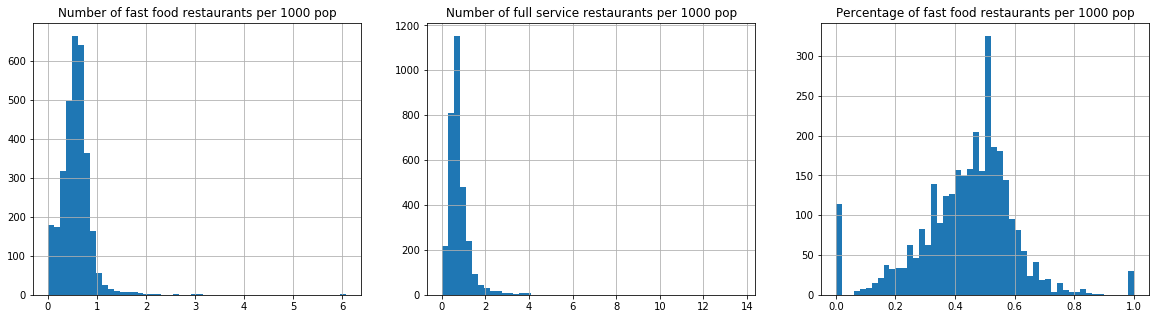

In [153]:
plt.figure(figsize=(20, 5))   
plt.subplot(1,3,1)
plt.title('Number of fast food restaurants per 1000 pop')
df_food['Fast_food'].hist(bins=50)
plt.legend()


plt.subplot(1,3,2)
plt.title('Number of full service restaurants per 1000 pop')
df_food['Full_service'].hist(bins=50)
plt.legend()


plt.subplot(1,3,3)
plt.title('Percentage of fast food restaurants per 1000 pop')
df_food['Percentage_fast_food'].hist(bins=50)
plt.legend()
plt.show()

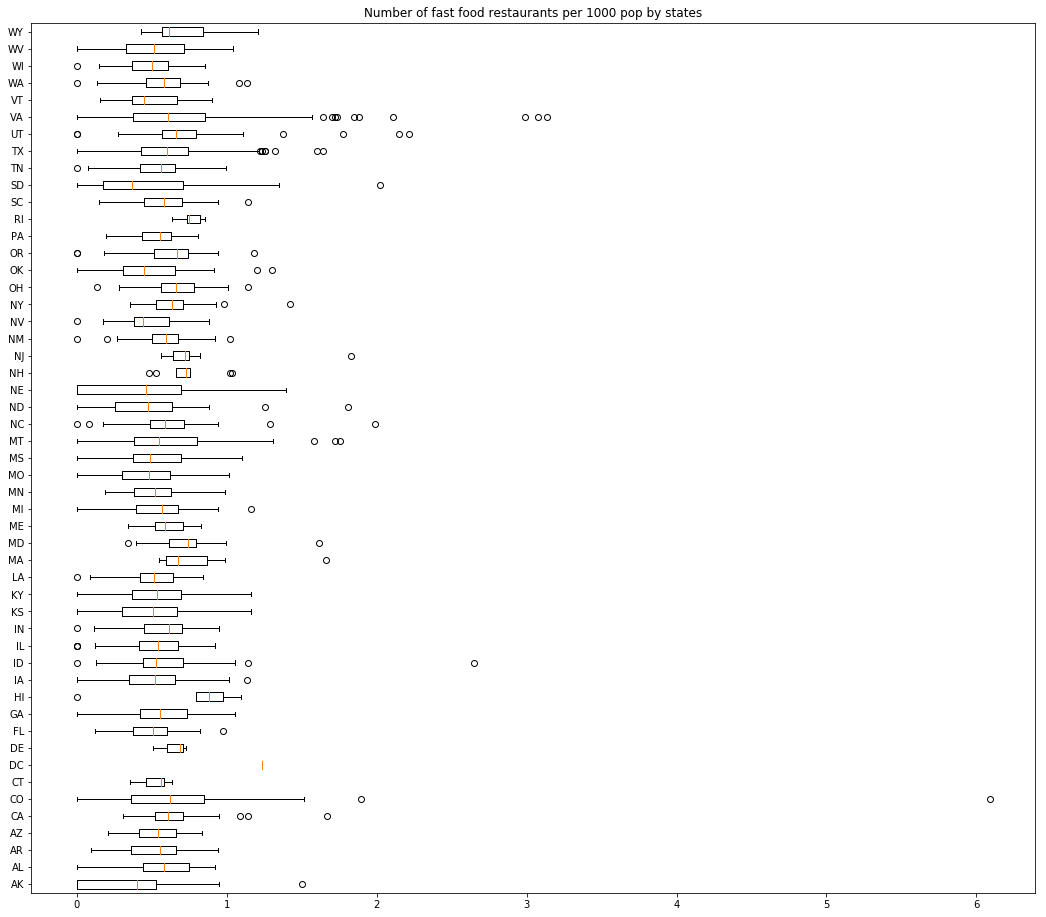

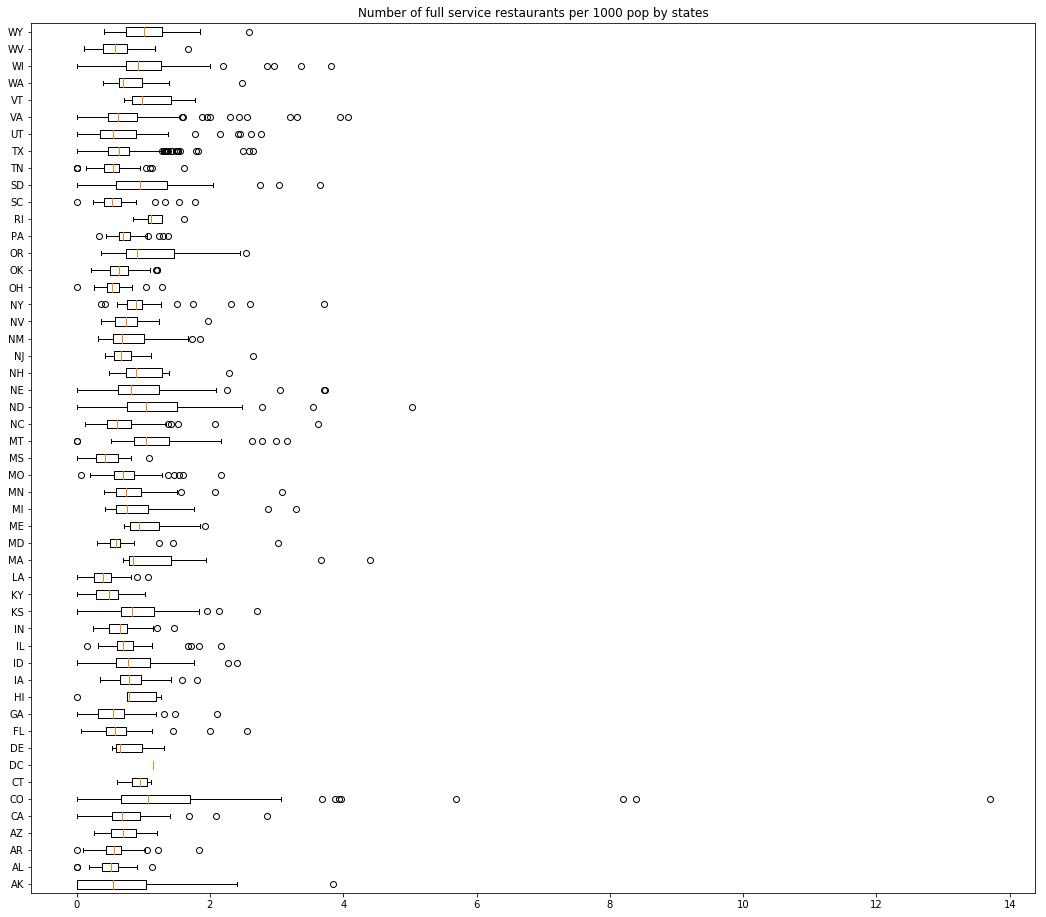

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


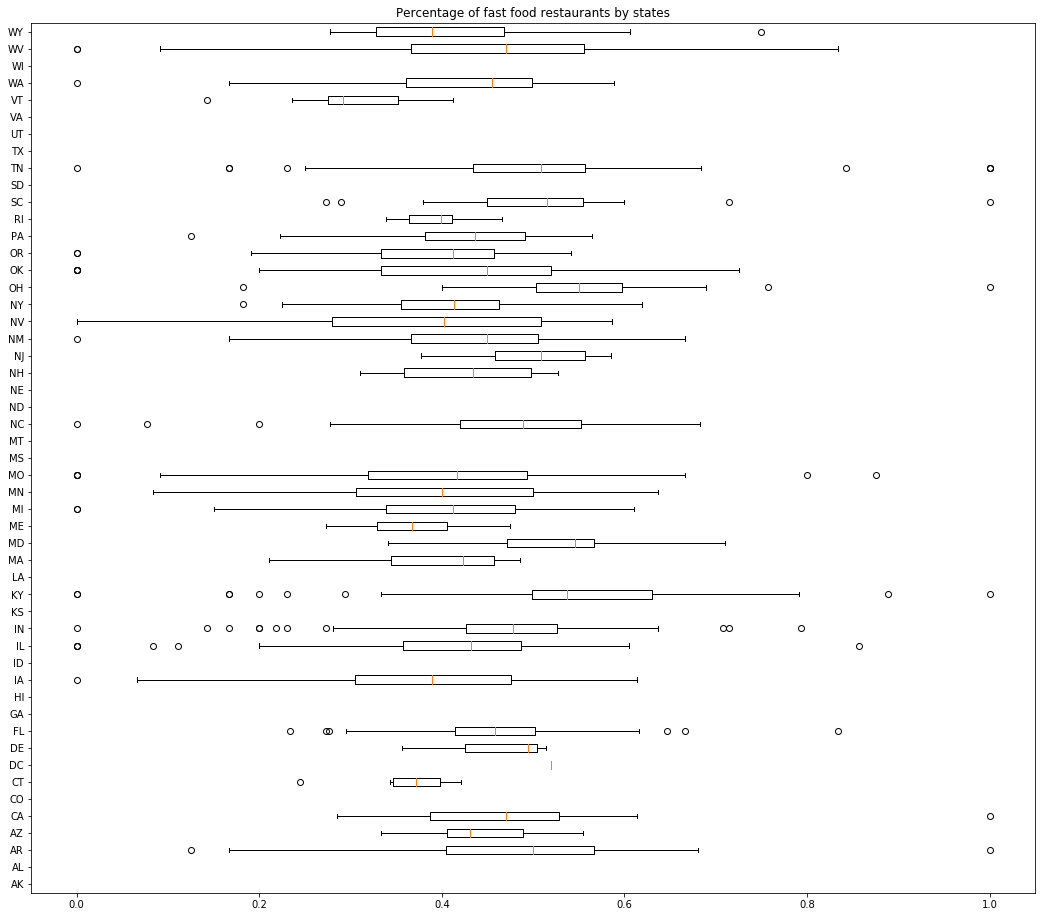

In [154]:
Boxplot_by_state(df_food, col='Fast_food', by='State', vert=0)
plt.title('Number of fast food restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Full_service', by='State', vert=0)
plt.title('Number of full service restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Percentage_fast_food', by='State', vert=0)
plt.title('Percentage of fast food restaurants by states')
plt.legend()
plt.show()

In [160]:
df_food.describe()
df_food['grocery_super']=df_food['Grocery']+df_food['Supercenter']
df_food['percentage_grocery_super']=(df_food['Grocery']+df_food['Supercenter'])/(df_food['Grocery']+df_food['Supercenter']
                                                                             # +df_food['Convenience']+df_food['Specialized'])
df_food['assist_store']=df_food['SNAP_store']+df_food['WIC_store']  

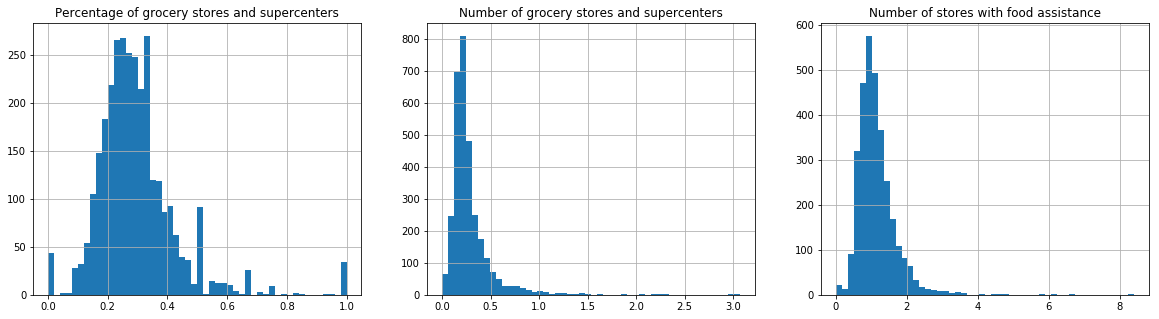

In [161]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,3,1)
plt.title('Percentage of grocery stores and supercenters')
df_food['percentage_grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,2)
plt.title('Number of grocery stores and supercenters')
df_food['grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,3)
plt.title('Number of stores with food assistance')
df_food['assist_store'].hist(bins=50)
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


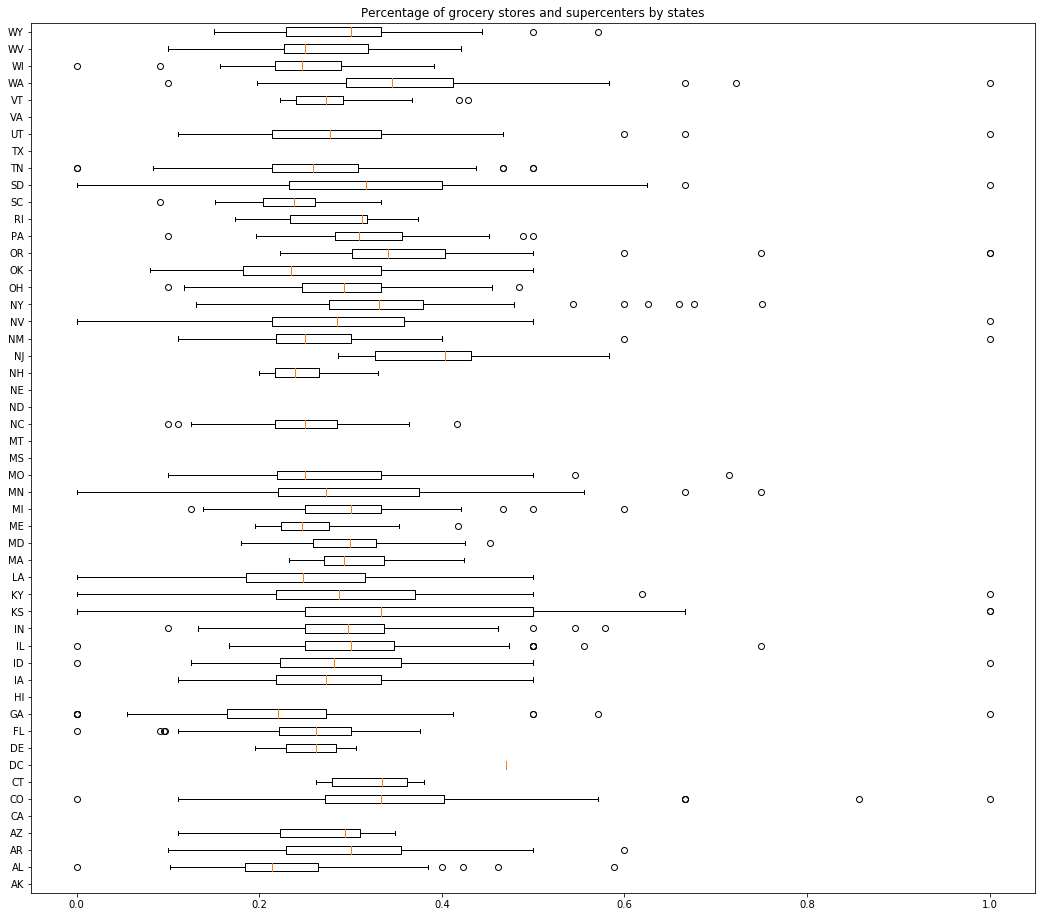

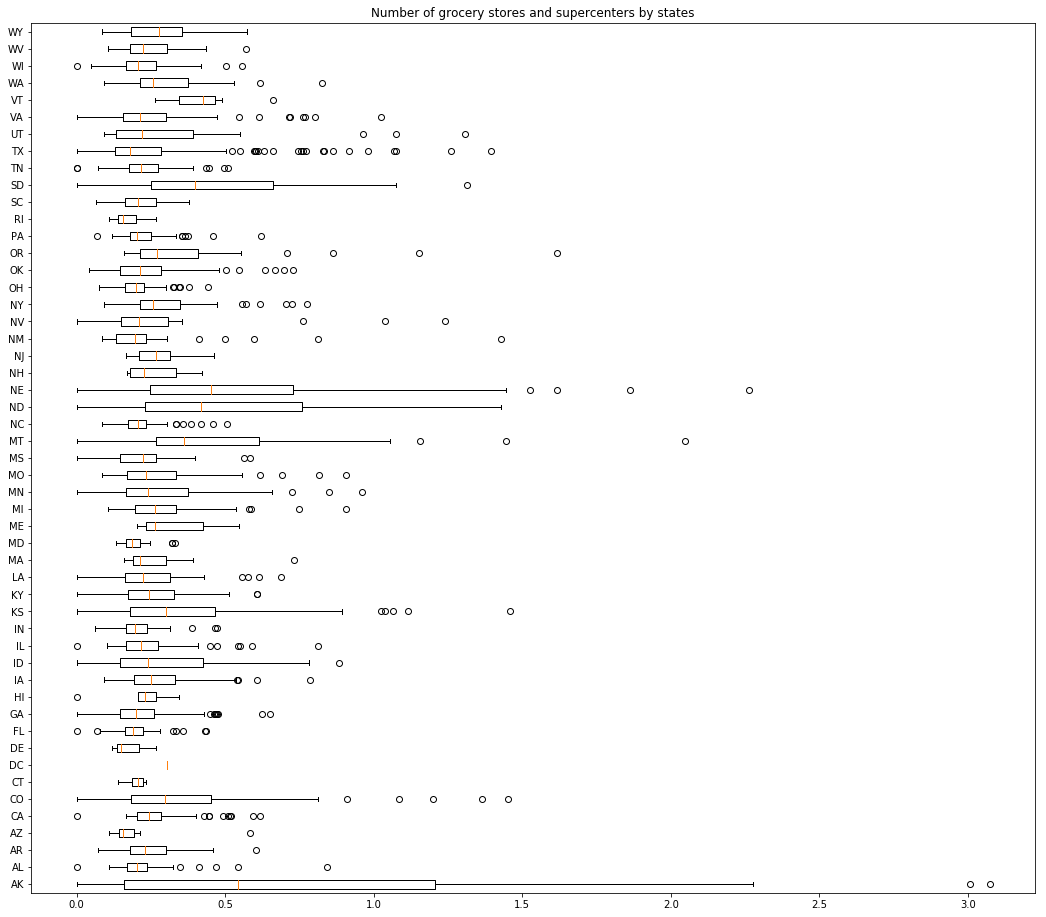

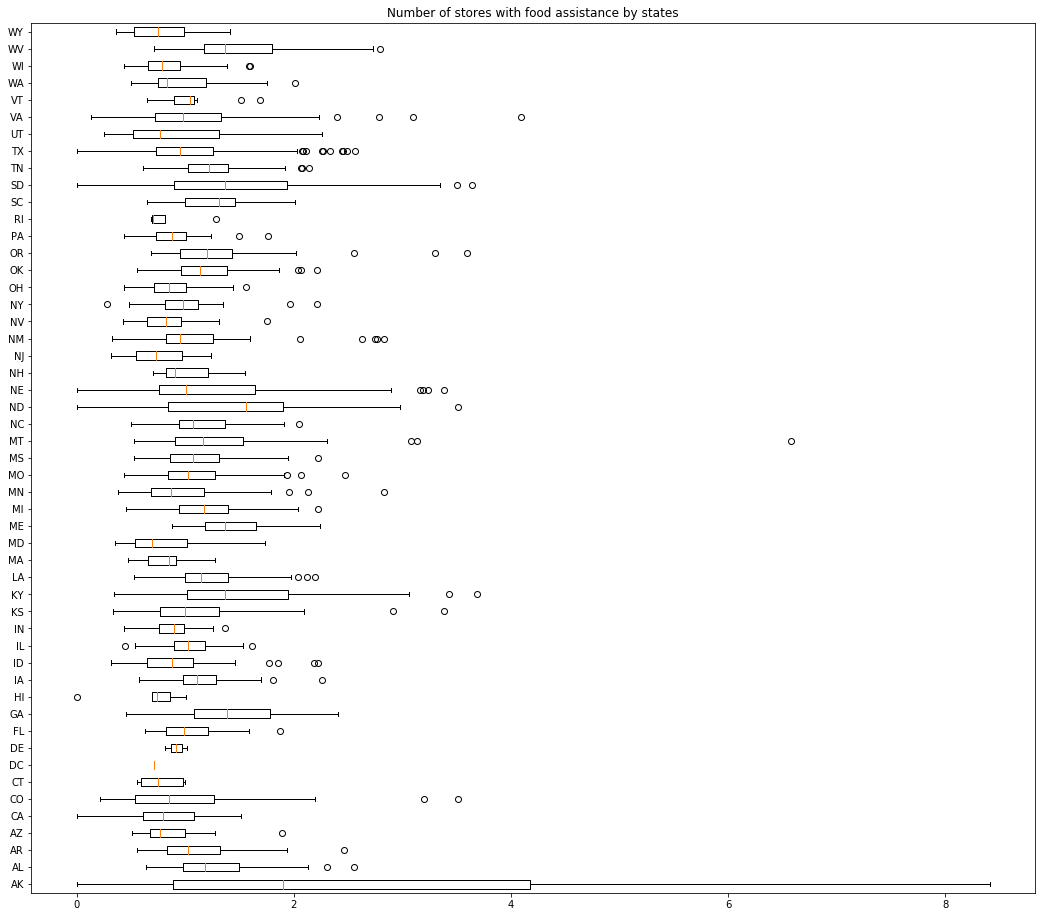

In [162]:
Boxplot_by_state(df_food, col='percentage_grocery_super', by='State', vert=0)
plt.title('Percentage of grocery stores and supercenters by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='grocery_super', by='State', vert=0)
plt.title('Number of grocery stores and supercenters by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='assist_store', by='State', vert=0)
plt.title('Number of stores with food assistance by states')
plt.legend()
plt.show()

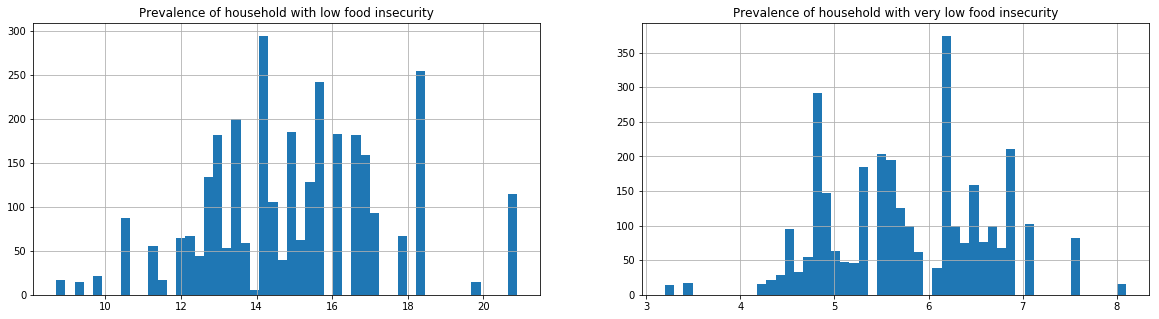

In [170]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,2,1)
plt.title('Prevalence of household with low food insecurity')
df_food['Low_insecurity'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.title('Prevalence of household with very low food insecurity')
df_food['Very_low_insecurity'].hist(bins=50)
plt.legend()
plt.show()

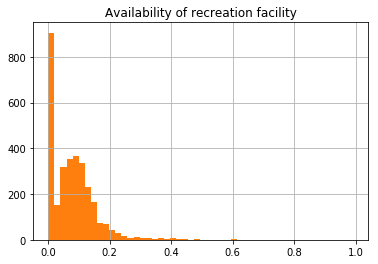

In [172]:
plt.title('Availability of recreation facility')
df_food['Recreation_facility'].hist(bins=50)
plt.legend()
plt.show()

In [174]:
df_db.describe()

,2004_db,2005_db,2006_db,2007_db,2008_db,2009_db,2010_db,2011_db,2012_db,2013_db
count,3224,3224,3224,3224,3224,3224,3224,3224,3224,3224
unique,122,127,130,133,132,141,145,152,157,164
top,7.9,8.6,9,9.4,9.5,11.1,9.7,11.3,11.2,9.5
freq,99,104,91,84,84,69,72,65,64,61


In [176]:
for c in df_db.columns:
    print(c, sum(df_db.applymap(lambda x: isinstance(x, (int, float)))[c]))

2004_db 0
2005_db 0
2006_db 0
2007_db 0
2008_db 0
2009_db 0
2010_db 0
2011_db 0
2012_db 0
2013_db 0


In [177]:
df_db=df_db.replace('No Data', np.nan)

In [178]:
df_db=df_db.astype(float)

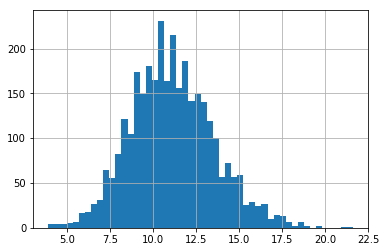

In [180]:
df_db['2011_db'].hist(bins=50)
plt.show()

In [181]:
df_ob.describe()

,2004_ob,2005_ob,2006_ob,2007_ob,2008_ob,2009_ob,2010_ob,2011_ob,2012_ob,2013_ob
count,3224,3224,3224,3224,3224,3224,3224,3146,3146,3146
unique,220,1185,243,241,245,259,260,265,267,267
top,No Data,No Data,No Data,No Data,No Data,No Data,No Data,30.6,31.5,32.6
freq,83,83,83,83,83,81,81,44,43,41


In [182]:
df_ob=df_ob.replace('No Data', np.nan)
df_ob=df_ob.astype(float)

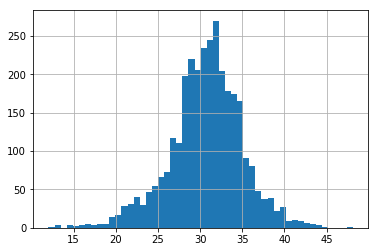

In [183]:
df_ob['2011_ob'].hist(bins=50)
plt.show()

In [184]:
df_phy.describe()

,2004_phy,2005_phy,2006_phy,2007_phy,2008_phy,2009_phy,2010_phy,2011_phy,2012_phy,2013_phy
count,3224,3224,3224,3224,3224,3224,3224,3224,3146,3146
unique,281,272,288,280,275,275,285,283,291,277
top,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,28.4,25.5
freq,83,83,83,83,83,81,81,81,36,39


In [185]:
df_phy=df_phy.replace('No Data', np.nan)
df_phy=df_phy.astype(float)

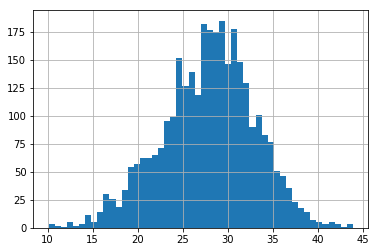

In [187]:
df_phy['2009_phy'].hist(bins=50)
plt.show()

Bivariate analysis

In [188]:
df_phy_db_ob=pd.concat([df_phy, df_db, df_ob],axis=1,join='inner')

In [190]:
#print (df_phy_db_ob.head(5))
df_phy_db_ob=df_phy_db_ob.dropna(how='any')
df_phy_db_ob.describe()

,2004_phy,2005_phy,2006_phy,2007_phy,2008_phy,2009_phy,2010_phy,2011_phy,2012_phy,2013_phy,...,2004_ob,2005_ob,2006_ob,2007_ob,2008_ob,2009_ob,2010_ob,2011_ob,2012_ob,2013_ob
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,...,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,25.930252,25.908001,26.258240,26.704399,27.061715,27.857188,27.851833,27.002040,27.363787,25.959675,...,25.280140,26.174794,27.458750,28.282595,28.930858,30.335544,30.554096,30.689959,30.946509,31.016736
std,5.238437,5.200704,5.390439,5.097763,5.054458,5.154111,5.290733,5.321085,5.414048,5.200744,...,3.245854,3.396004,3.568665,3.627450,3.711698,4.161749,4.242740,4.342366,4.467809,4.525856
min,9.200000,9.600000,8.900000,9.800000,9.700000,10.100000,10.400000,9.200000,9.100000,8.100000,...,12.300000,11.730000,12.600000,12.500000,11.700000,13.700000,13.100000,12.000000,10.700000,11.800000
25%,22.600000,22.800000,22.900000,23.700000,24.100000,24.600000,24.500000,23.500000,23.900000,22.600000,...,23.900000,24.820000,26.000000,26.700000,27.200000,28.100000,28.300000,28.400000,28.500000,28.300000
50%,25.800000,25.700000,26.100000,26.800000,27.300000,28.200000,28.100000,27.300000,27.700000,25.800000,...,25.400000,26.250000,27.600000,28.500000,29.100000,30.500000,30.700000,30.900000,31.200000,31.200000
75%,29.100000,28.900000,29.500000,29.900000,30.100000,31.300000,31.400000,30.700000,30.900000,29.400000,...,26.900000,28.000000,29.400000,30.200000,31.000000,32.800000,33.100000,33.400000,33.700000,33.800000
max,42.400000,43.900000,44.700000,44.400000,44.800000,43.900000,44.900000,42.700000,41.700000,41.400000,...,38.000000,38.950000,41.900000,43.500000,43.700000,47.600000,47.900000,48.100000,46.600000,47.600000


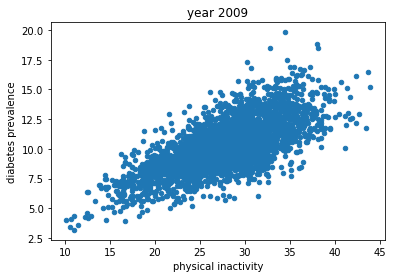

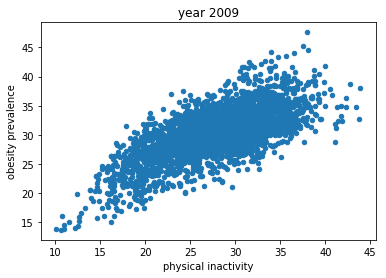

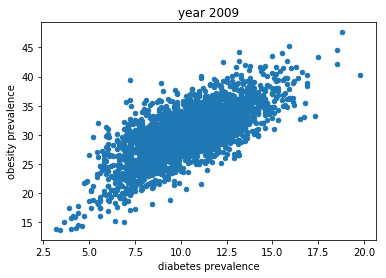

In [197]:
year=2009
#plt.figure(figsize=(20, 5))  
    
#plt.subplot(1,3,1)
df_phy_db_ob.plot(x=str(year)+'_phy', y=str(year)+'_db', kind='scatter')
plt.xlabel('physical inactivity')
plt.ylabel('diabetes prevalence')
plt.title('year '+str(year))
plt.show()
    
#plt.subplot(1,3,2)
df_phy_db_ob.plot(x=str(year)+'_phy', y=str(year)+'_ob', kind='scatter')
plt.xlabel('physical inactivity')
plt.ylabel('obesity prevalence')
plt.title('year '+str(year))
plt.show()

#plt.subplot(1,3,3)
df_phy_db_ob.plot(x=str(year)+'_db', y=str(year)+'_ob', kind='scatter')
plt.xlabel('diabetes prevalence')
plt.ylabel('obesity prevalence')
plt.title('year '+str(year))
plt.show()

In [209]:
#df_whole=pd.concat([df_food, df_phy, df_db, df_ob],axis=1,join='inner')
#df_whole=df_whole.dropna(how='any')
df_whole.columns

Index(['State', 'County', 'Low_Access_Overall', 'Low_Access_Low_income',
       'Low_Access_Children', 'Low_Access_Senior', 'Grocery', 'Supercenter',
       'Convenience', 'Specialized', 'SNAP_store', 'WIC_store', 'Fast_food',
       'Full_service', 'Assistance', 'Low_insecurity', 'Very_low_insecurity',
       'Recreation_facility', 'Low_Access_Adult', 'Percentage_fast_food',
       'grocery_super', 'percentage_grocery_super', 'assist_store', '2004_phy',
       '2005_phy', '2006_phy', '2007_phy', '2008_phy', '2009_phy', '2010_phy',
       '2011_phy', '2012_phy', '2013_phy', '2004_db', '2005_db', '2006_db',
       '2007_db', '2008_db', '2009_db', '2010_db', '2011_db', '2012_db',
       '2013_db', '2004_ob', '2005_ob', '2006_ob', '2007_ob', '2008_ob',
       '2009_ob', '2010_ob', '2011_ob', '2012_ob', '2013_ob'],
      dtype='object')

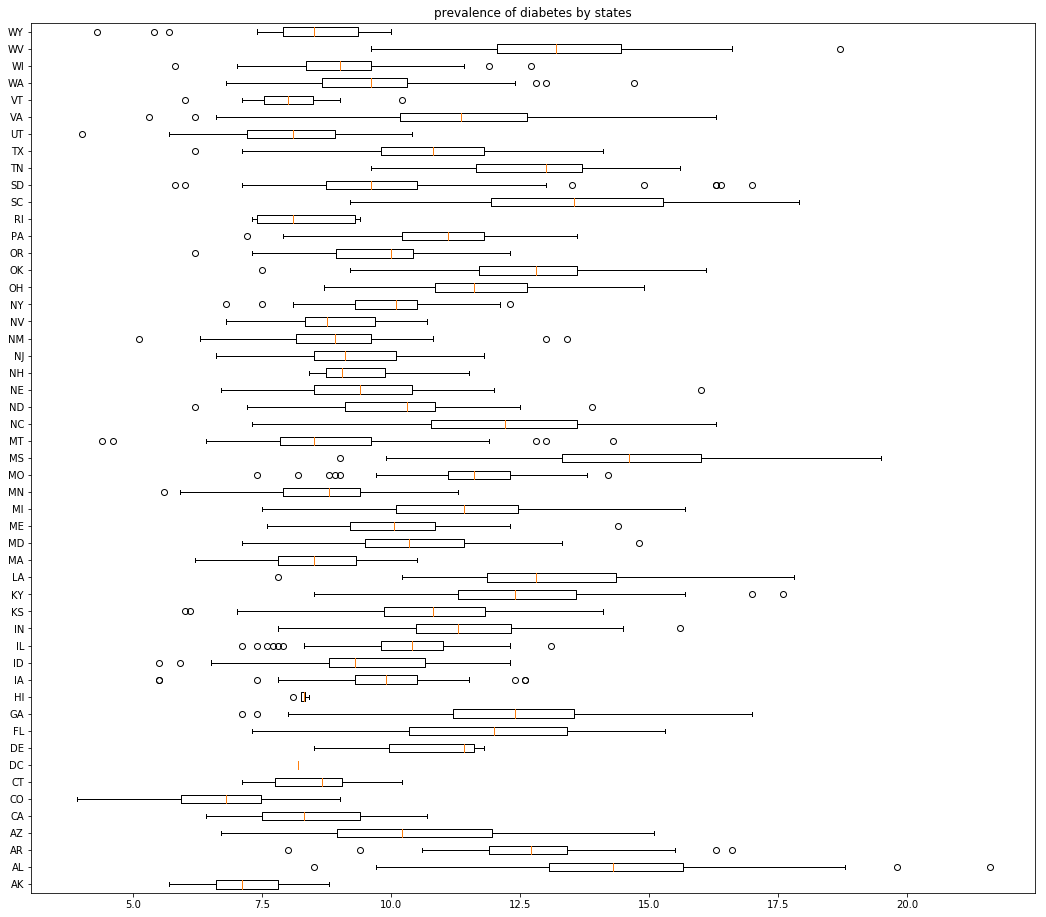

In [237]:
Boxplot_by_state(df_whole, col='2011_db', by='State', vert=0)
plt.title('prevalence of diabetes by states')
plt.legend()
plt.show()

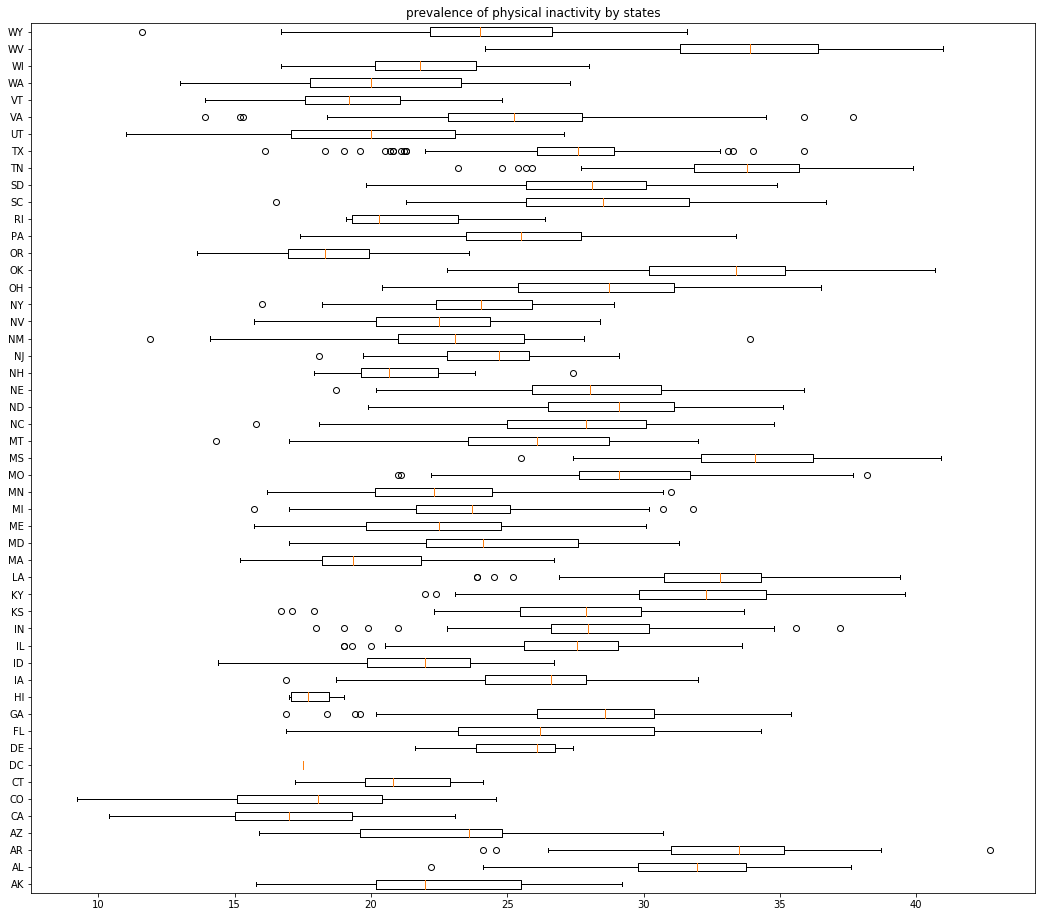

In [238]:
Boxplot_by_state(df_whole, col='2011_phy', by='State', vert=0)
plt.title('prevalence of physical inactivity by states')
plt.legend()
plt.show()

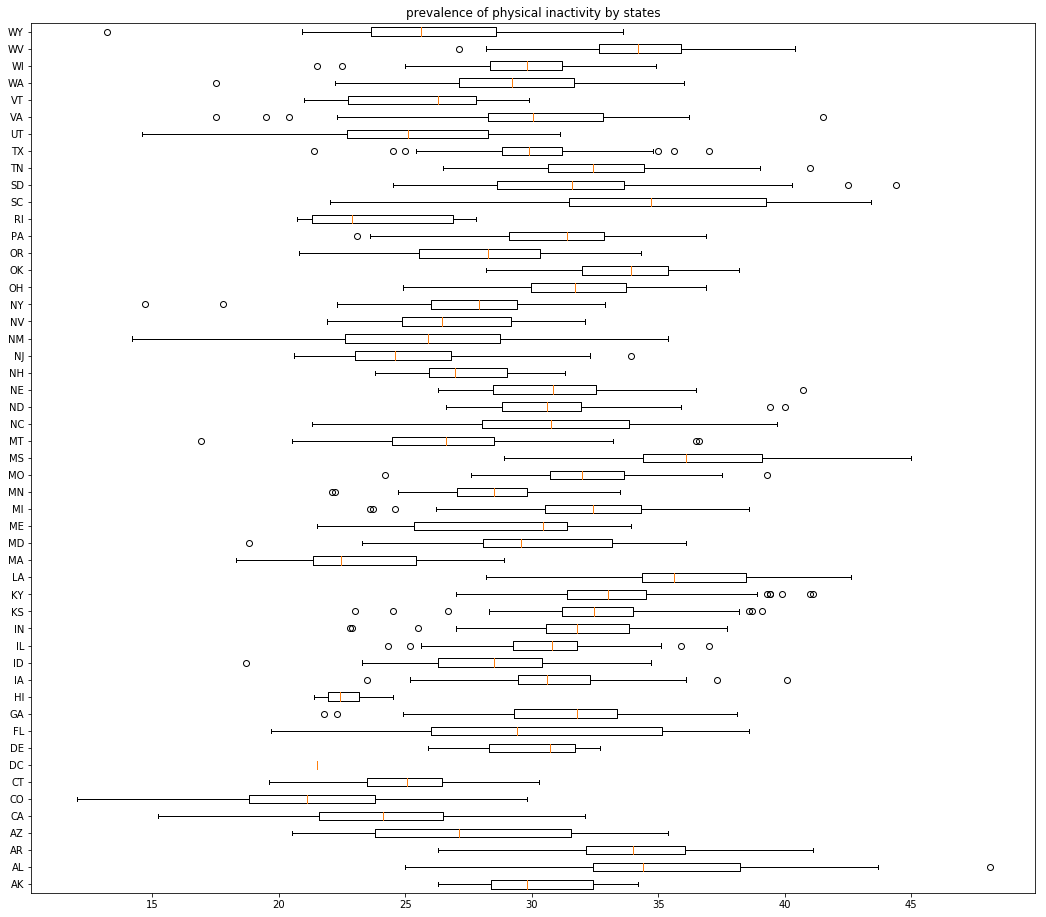

In [239]:
Boxplot_by_state(df_whole, col='2011_ob', by='State', vert=0)
plt.title('prevalence of physical inactivity by states')
plt.legend()
plt.show()

In [ ]:
Boxplot_by_state(df_whole, col='2011_phy', by='State', vert=0)
plt.title('prevalence of physical inactivity by states')
plt.legend()
plt.show()

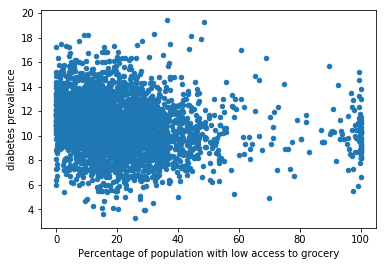

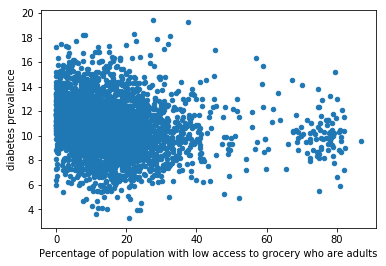

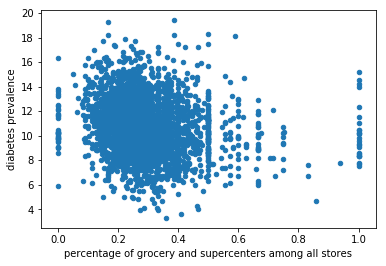

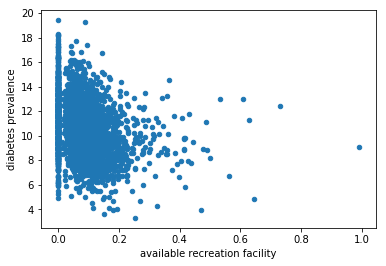

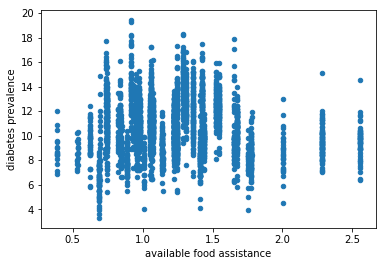

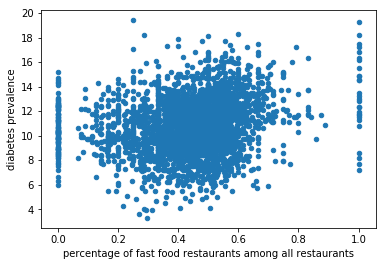

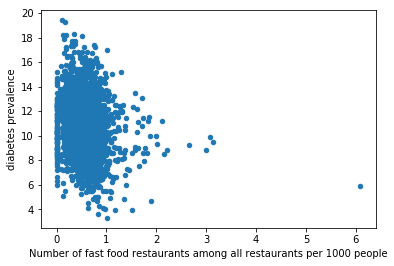

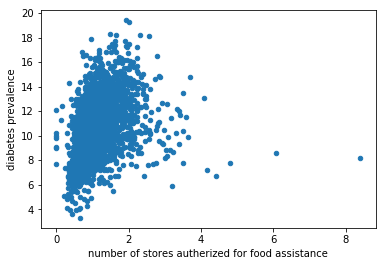

In [216]:
#plt.subplot(1,3,1)
df_whole.plot(x='Low_Access_Overall', y='2010_db', kind='scatter')
plt.xlabel('Percentage of population with low access to grocery')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='Low_Access_Adult', y='2010_db', kind='scatter')
plt.xlabel('Percentage of population with low access to grocery who are adults')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='percentage_grocery_super', y='2010_db', kind='scatter')
plt.xlabel('percentage of grocery and supercenters among all stores')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='Recreation_facility', y='2010_db', kind='scatter')
plt.xlabel('available recreation facility')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='Assistance', y='2010_db', kind='scatter')
plt.xlabel('available food assistance')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='Percentage_fast_food', y='2010_db', kind='scatter')
plt.xlabel('percentage of fast food restaurants among all restaurants')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='Fast_food', y='2010_db', kind='scatter')
plt.xlabel('Number of fast food restaurants among all restaurants per 1000 people')
plt.ylabel('diabetes prevalence')
plt.show()

df_whole.plot(x='assist_store', y='2010_db', kind='scatter')
plt.xlabel('number of stores autherized for food assistance')
plt.ylabel('diabetes prevalence')
plt.show()

Examine interaction using groupby

In [ ]:
year=2009
df_whole['Level_physical_inactivity']=df_whole[str(year)+'_phy']//10.
#print (df_whole[['Level_physical_inactivity',str(year)+'_phy']])
df_whole['Level_physical_inactivity']=df_whole['Level_physical_inactivity'].astype('category')

In [ ]:
df_groupby=df_whole.groupby(by='Level_physical_inactivity')

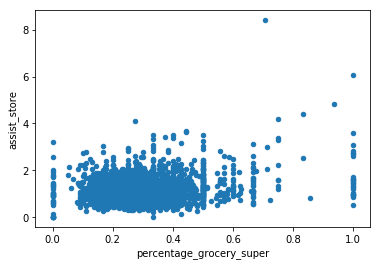

In [236]:
df_whole.plot(x='percentage_grocery_super',y='assist_store',kind='scatter')
plt.show()
#df_groupby.plot(x='assist_store',y='2012_db',kind='scatter')
#plt.show()